In [ ]:
!pip install xlrd
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import os 

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc
from matplotlib import rcParams

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
def to_month(num):
  monList = ['1월','2월','3월','4월','5월','6월',
             '7월','8월','9월','10월','11월','12월']
  return monList[num - 1]

In [ ]:
name = ['건설환경공학과','건축학부',
        '교통물류공학과','국방정보공학과',
        '기계공학과','로봇공학과',
        '산업경영공학과','생명나노공학과',
        '스마트융합공학과','재료화학공학과']

In [ ]:
Spend = []
# 학생회비
SCF = [] # Student council fee
# 야식사업 지출
Snack_Money = []

In [ ]:
i = int(input())
# Name의 Index번호로 출력가능

9


In [ ]:
Uni_name = name[i]
path_name = '/content/drive/MyDrive/데이터 분석 동아리/Data/공대 데이터/' + Uni_name + '.xlsx'
df = pd.read_excel(path_name)
df = df.fillna(0)
df.columns = ['날짜', '내용', '수입', '지출', '잔액', '사업', '세부항목', '영수증']

In [ ]:
date_df = df["날짜"]
content_df = df['내용']
income_df = df['수입']
spend_df = df['지출']
balance_df = df['잔액']
purpose_df = df['사업']
detail_df = df['세부항목']

In [ ]:
df["날짜"] = pd.to_datetime(df["날짜"], format='%Y-%m-%d')
df["날짜"] = pd.Categorical(
    df['날짜'].dt.month.apply(to_month), 
    categories = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']
)

In [ ]:
# 사업의 종류
df['사업'].unique()

array(['꿈터 지원비', '꿈터 물품 준비', '2학기 개강총회 ', '2학기 개강총회', '이자', '3분기 생일자 이벤트',
       '학회 지원금', '2학기 중간고사 야식 사업', '대여사업 구비물품', '공학대학 학생선거',
       '2학기 기말고사 야식 사업', '2학기 종강총회 추첨 이벤트', 'MC카페 추첨 이벤트', '2학기 종강총회',
       '4분기 생일자 이벤트'], dtype=object)

In [ ]:
# 총 수입
df['수입'].sum()

3305

In [ ]:
# 총 지출
a = df['지출'].sum()
print(a)
Spend.append(a)

8549150


In [ ]:
# 잔액
# 지출이 over 되었음을 알 수 있음

print(df['수입'].sum() - df['지출'].sum())

-8545845


## 사업별 지출, 수입 그래프

In [ ]:
sum_event = df.groupby('사업').sum()
sum_event = sum_event.reset_index()
sum_event

,사업,수입,지출,잔액
0,2학기 개강총회,0,975800,15157262
1,2학기 개강총회,0,21200,8079431
2,2학기 기말고사 야식 사업,0,849000,4346055
3,2학기 종강총회,0,1150000,2064036
4,2학기 종강총회 추첨 이벤트,0,633260,7076831
5,2학기 중간고사 야식 사업,0,960000,5651495
6,3분기 생일자 이벤트,0,194200,69986950
7,4분기 생일자 이벤트,0,134400,13902552
8,MC카페 추첨 이벤트,0,500000,10492108
9,공학대학 학생선거,0,26140,5395055


In [ ]:
Total_StudentIncome1 = df.loc[df['사업'].str.contains('학생회비', na = False), '수입'].sum()


SCF.append(Total_StudentIncome1)

In [ ]:
Snack1 = df.loc[df['사업'].str.contains('야식', na = False), '지출'].sum()

Snack_Money.append(Snack1)

### 사업별 수입 그래프

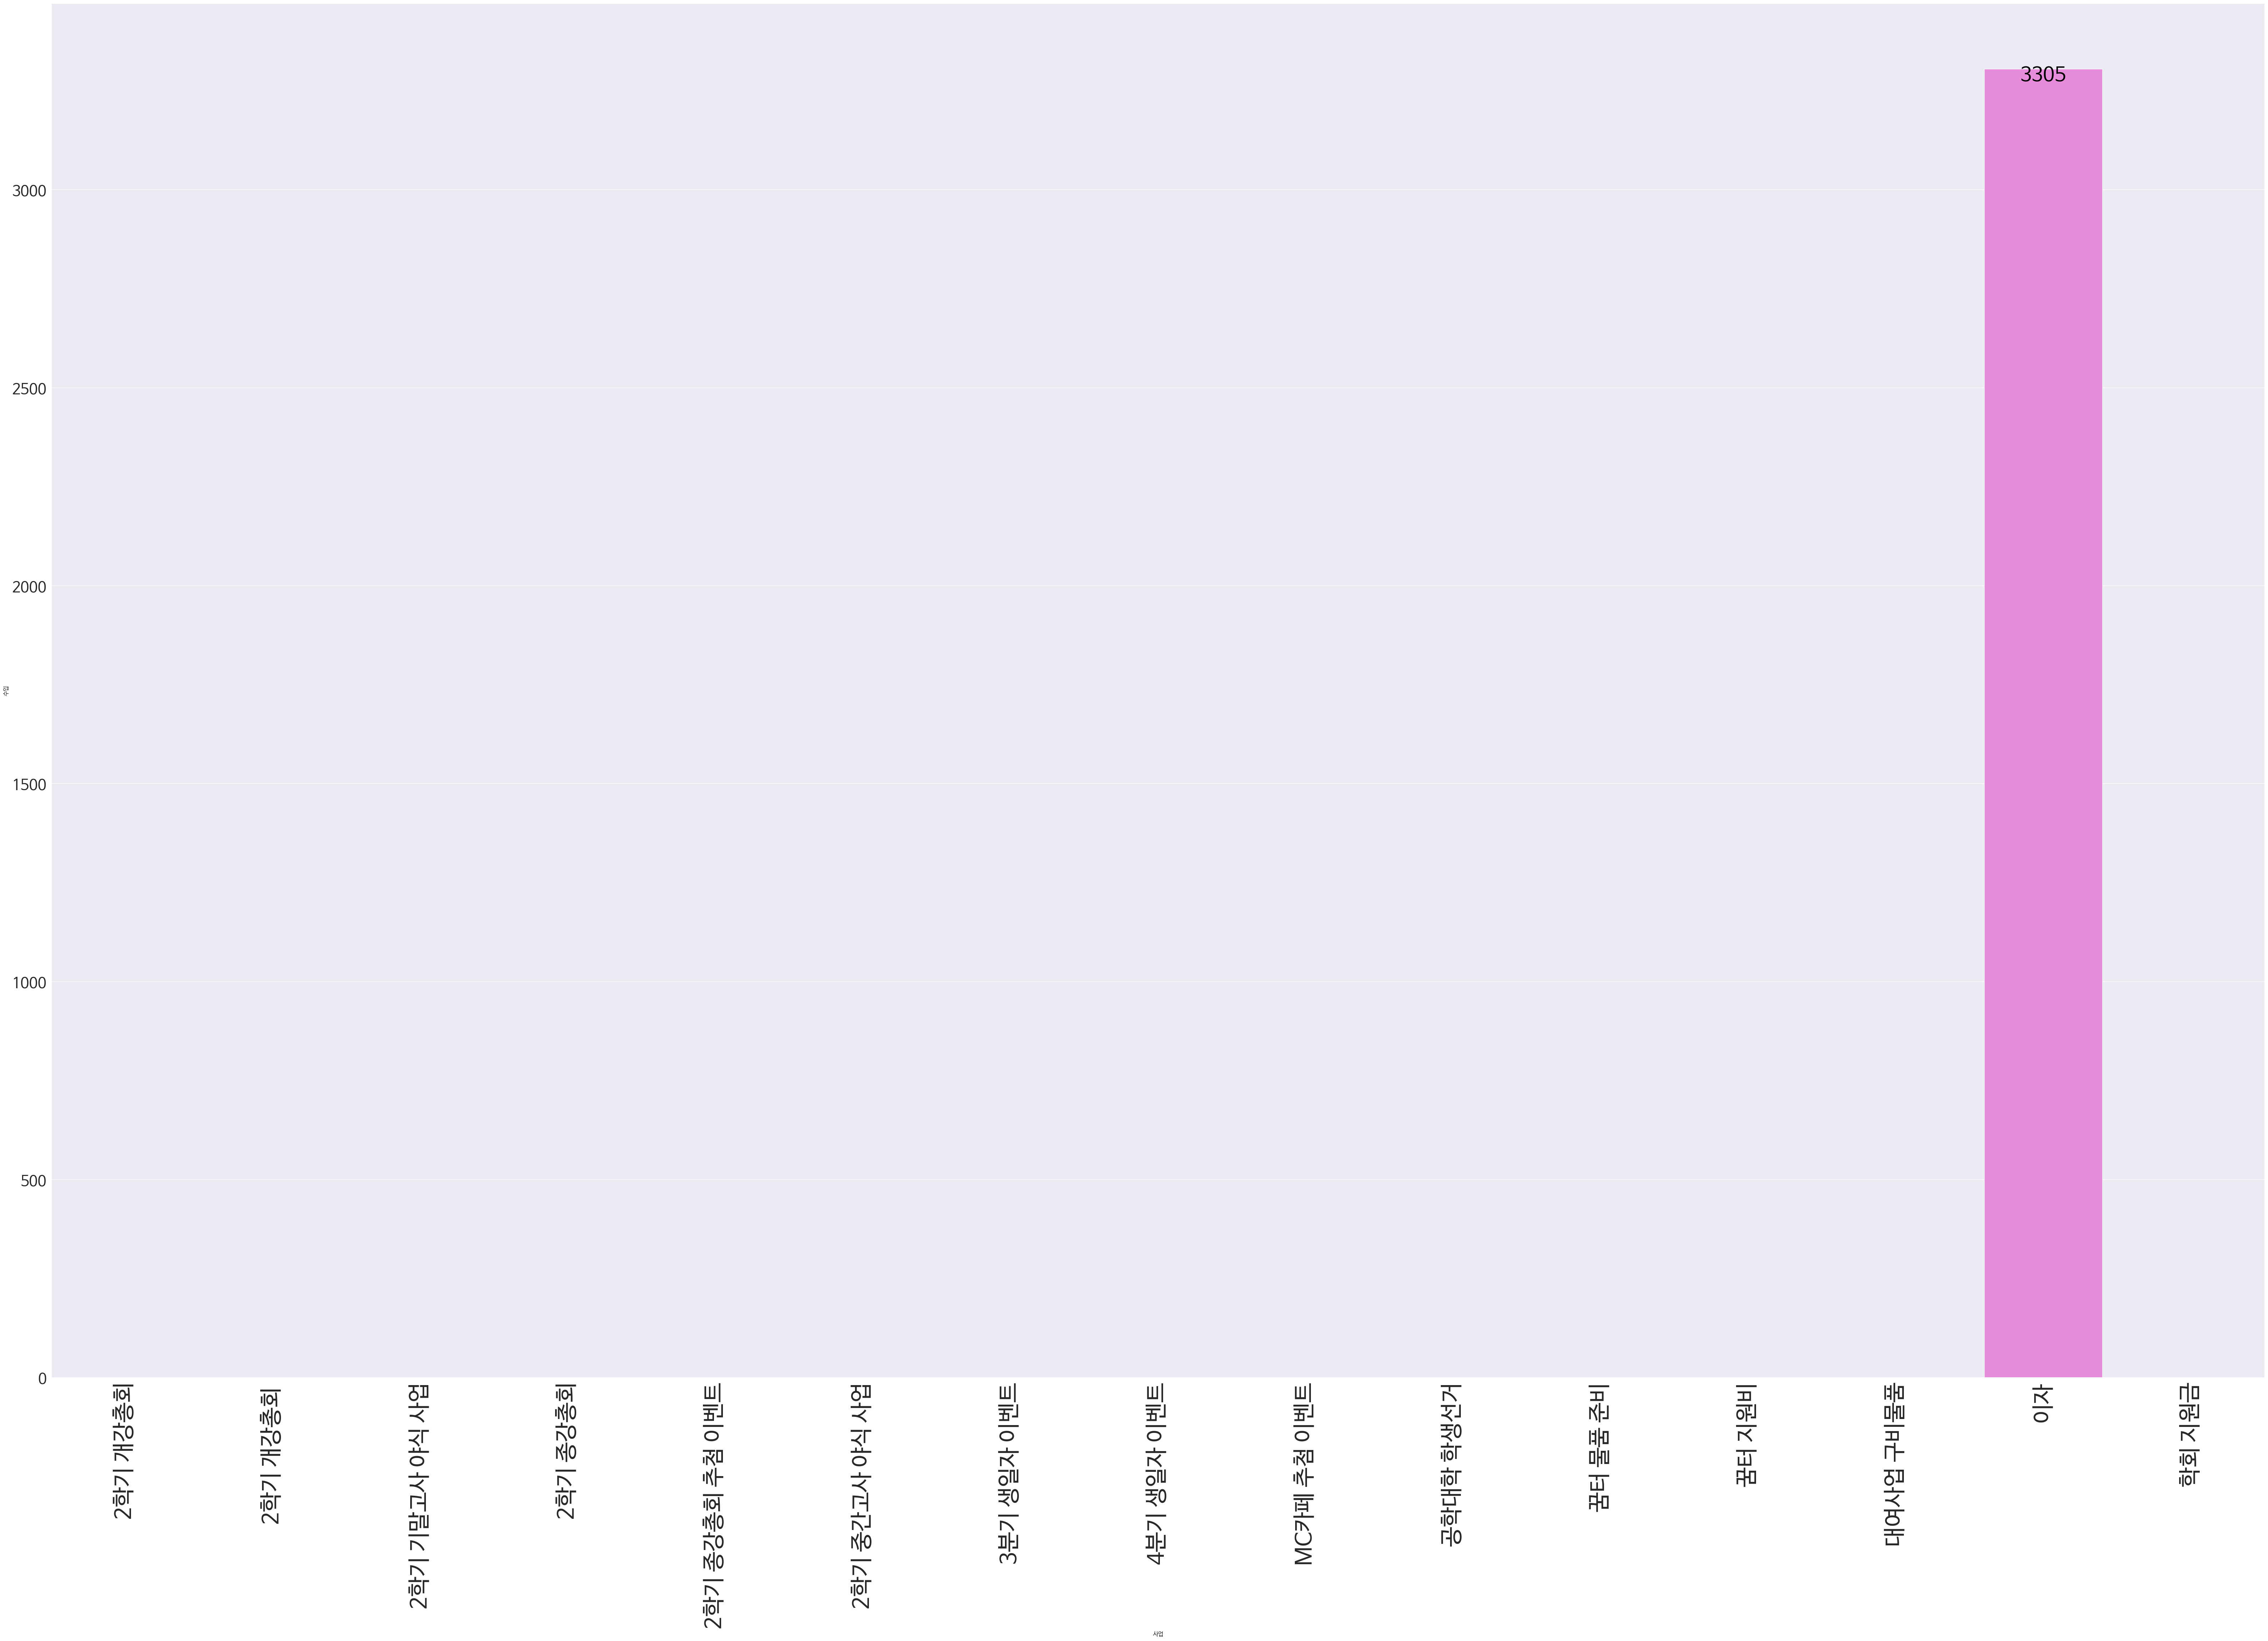

In [ ]:
g = sns.barplot(data=sum_event, x="사업",y="수입", ci=None)
ax = g

sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
plt.rc('xtick', labelsize=60)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=60)
plt.rc('font', family='NanumBarunGothic') 
plt.xticks(fontsize=45, rotation=90)

rcParams['figure.figsize'] = 80, 40
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

for p in ax.patches: 
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
       ha='center', va='center', fontsize=40, color='black', xytext=(0, 10), 
       textcoords='offset points') 

plt.show()

### 사업별 지출 그래프

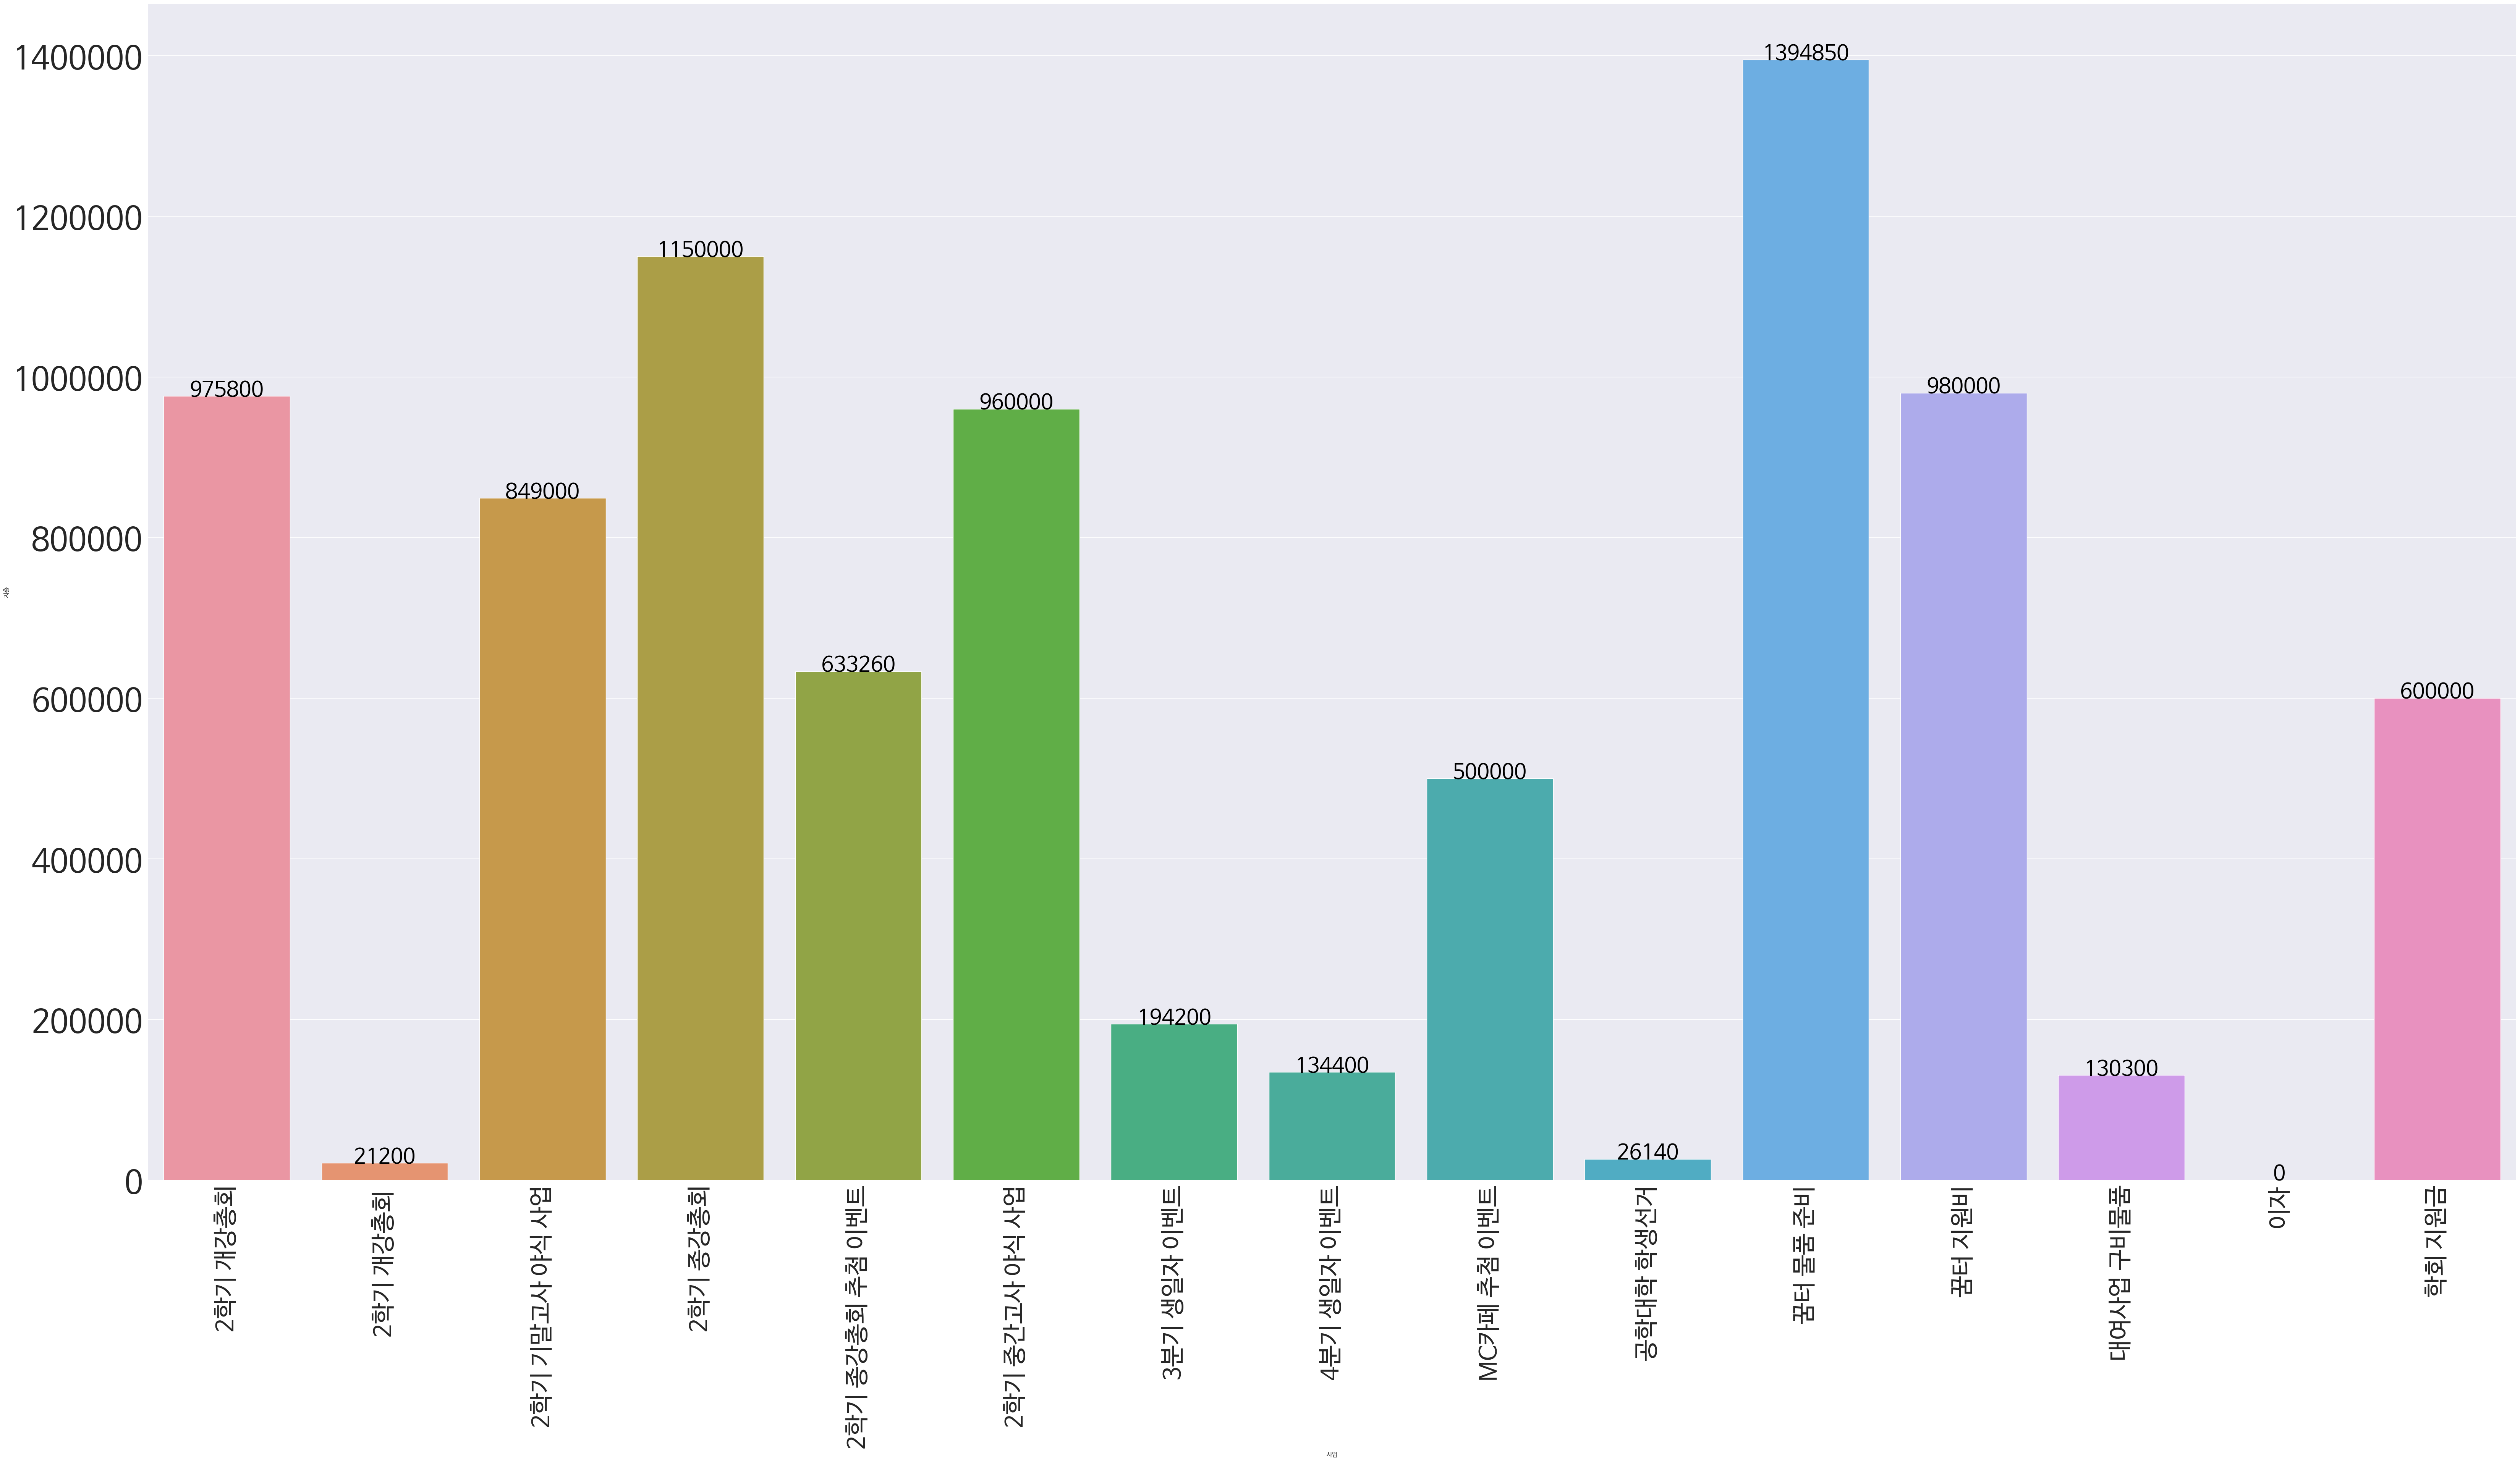

In [ ]:
g = sns.barplot(data=sum_event, x="사업",y="지출", ci=None)
ax = g

sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
plt.rc('xtick', labelsize=60)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=60)
plt.rc('font', family='NanumBarunGothic') 
plt.xticks(fontsize=45, rotation=90)

rcParams['figure.figsize'] = 80, 40
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

for p in ax.patches: 
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
       ha='center', va='center', fontsize=40, color='black', xytext=(0, 10), 
       textcoords='offset points') 

plt.show()

## 월별 토탈

In [ ]:
spend_money = df.groupby('날짜')['지출'].sum()
spend_money = spend_money.reset_index()
spend_money

,날짜,지출
0,1월,0
1,2월,0
2,3월,0
3,4월,0
4,5월,0
5,6월,0
6,7월,0
7,8월,2374850
8,9월,997000
9,10월,1454200


In [ ]:
income_money = df.groupby('날짜')['수입'].sum()
income_money = income_money.reset_index()
income_money

,날짜,수입
0,1월,0
1,2월,0
2,3월,0
3,4월,0
4,5월,0
5,6월,0
6,7월,0
7,8월,0
8,9월,2064
9,10월,0


### 월별 지출 그래프

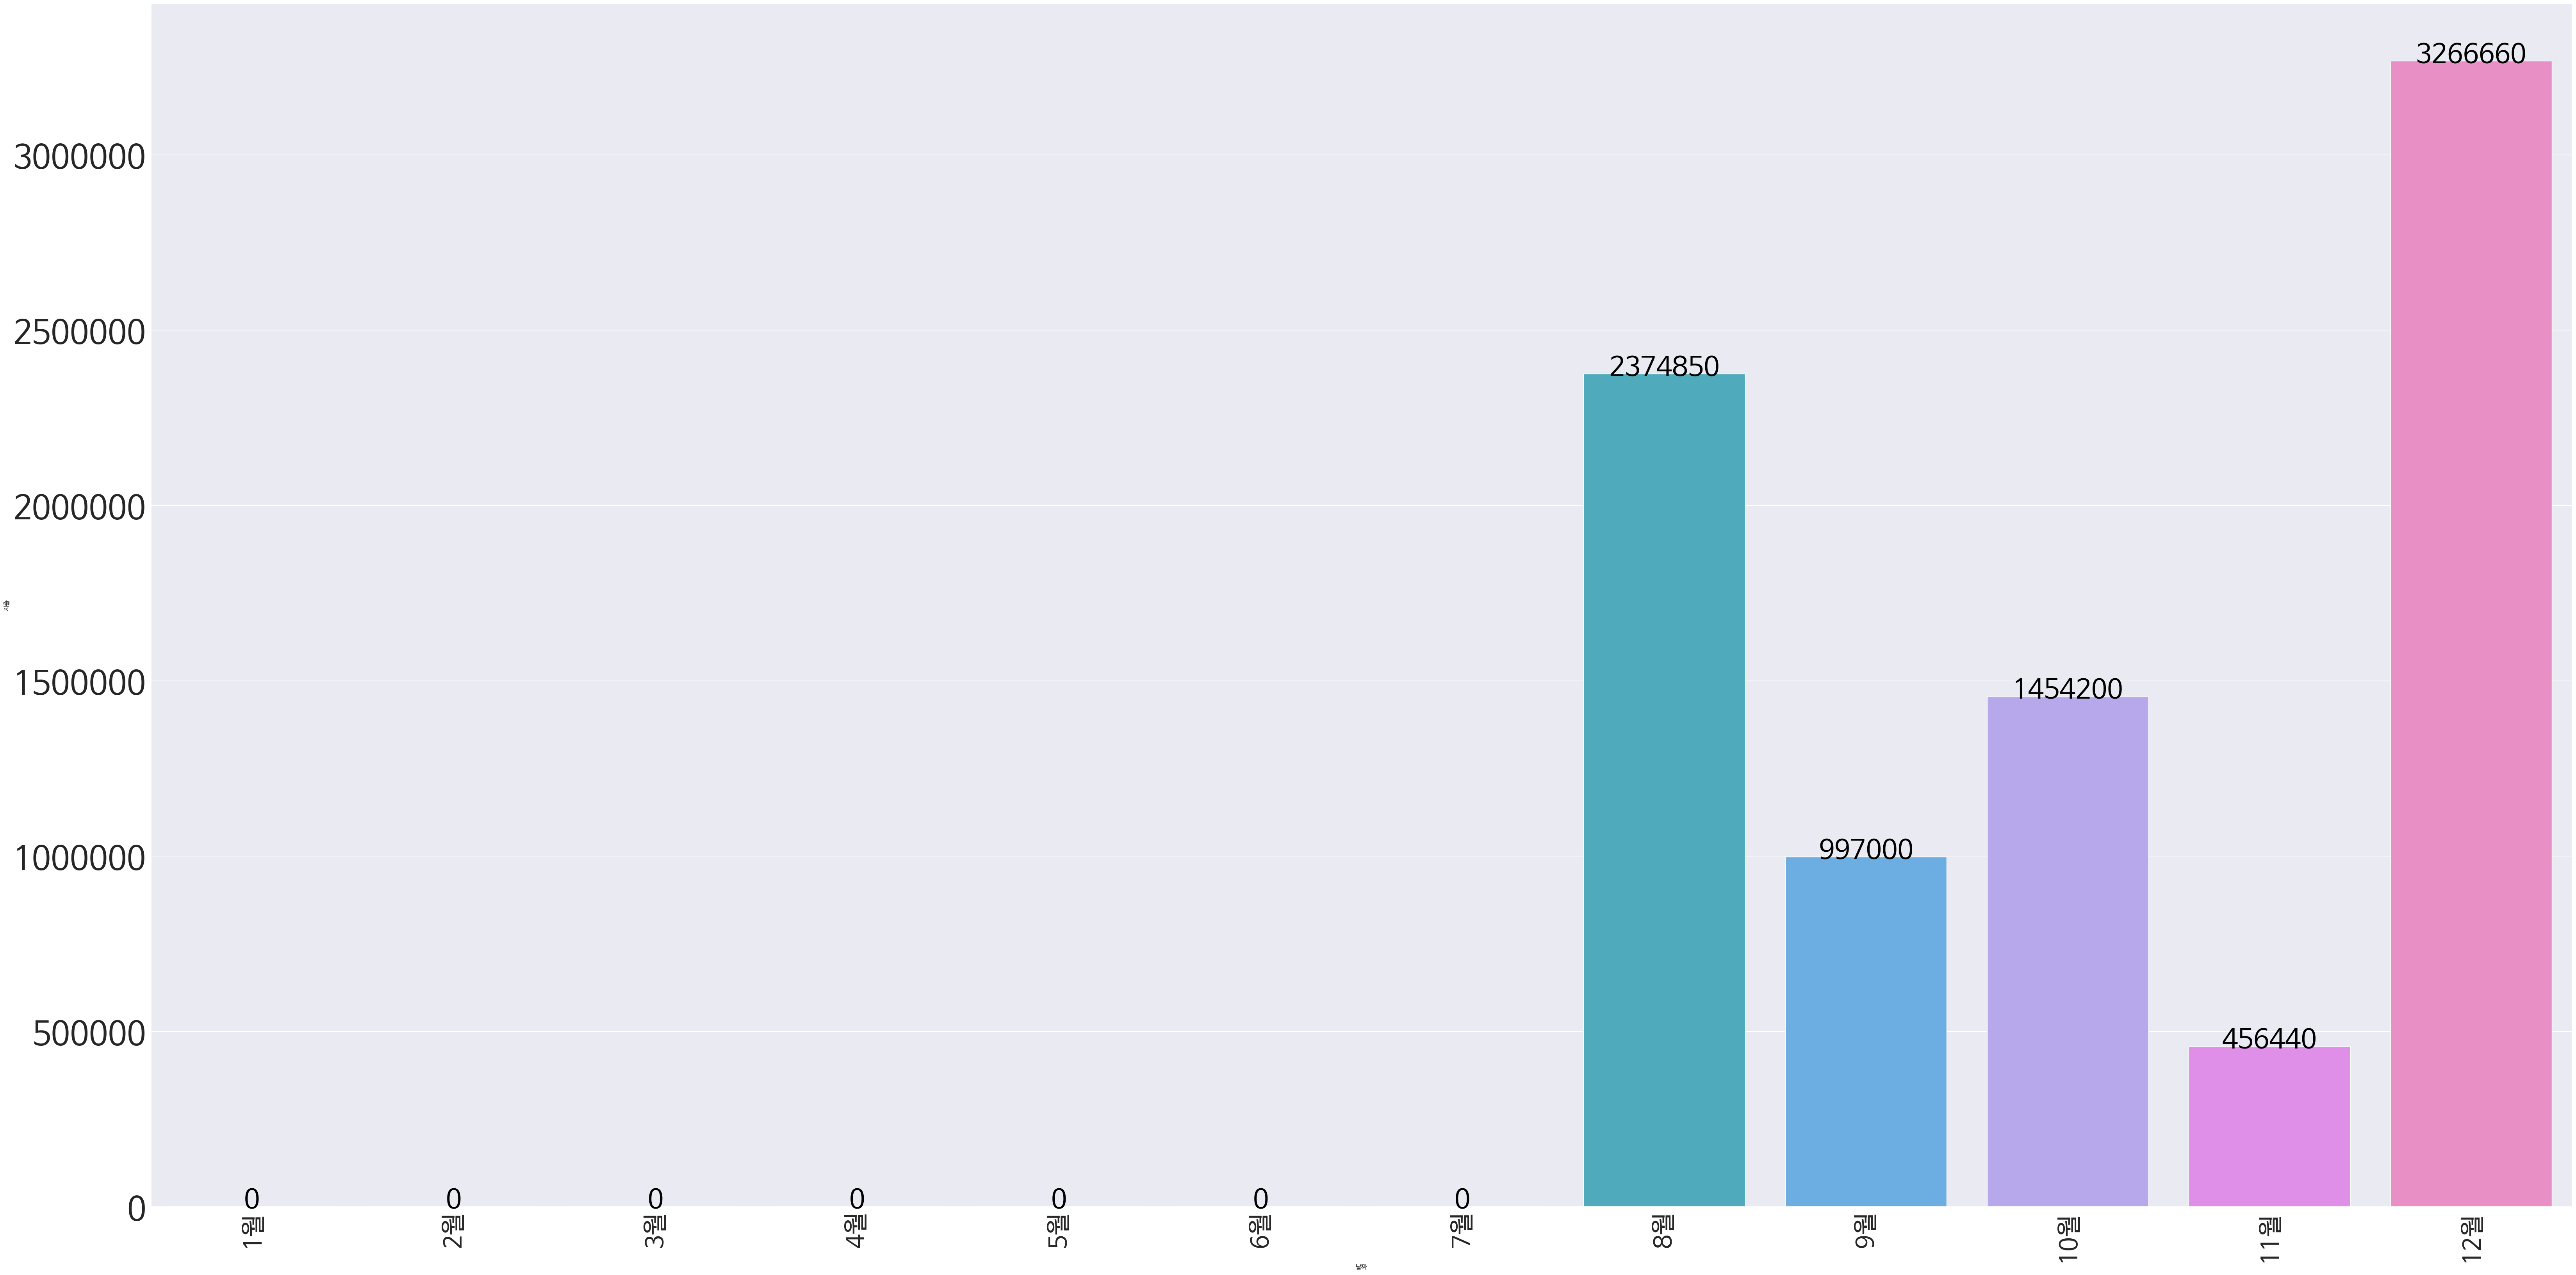

In [ ]:
g = sns.barplot(data= spend_money ,x= "날짜",y= "지출", ci=None)
ax = g

sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
plt.rc('xtick', labelsize=60)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=60)
plt.rc('font', family='NanumBarunGothic') 
plt.xticks(fontsize=45, rotation=90)

rcParams['figure.figsize'] = 80, 40
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

for p in ax.patches: 
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
       ha='center', va='center', fontsize=50, color='black', xytext=(0, 10), 
       textcoords='offset points') 

plt.show()

### 월별 수입 그래프

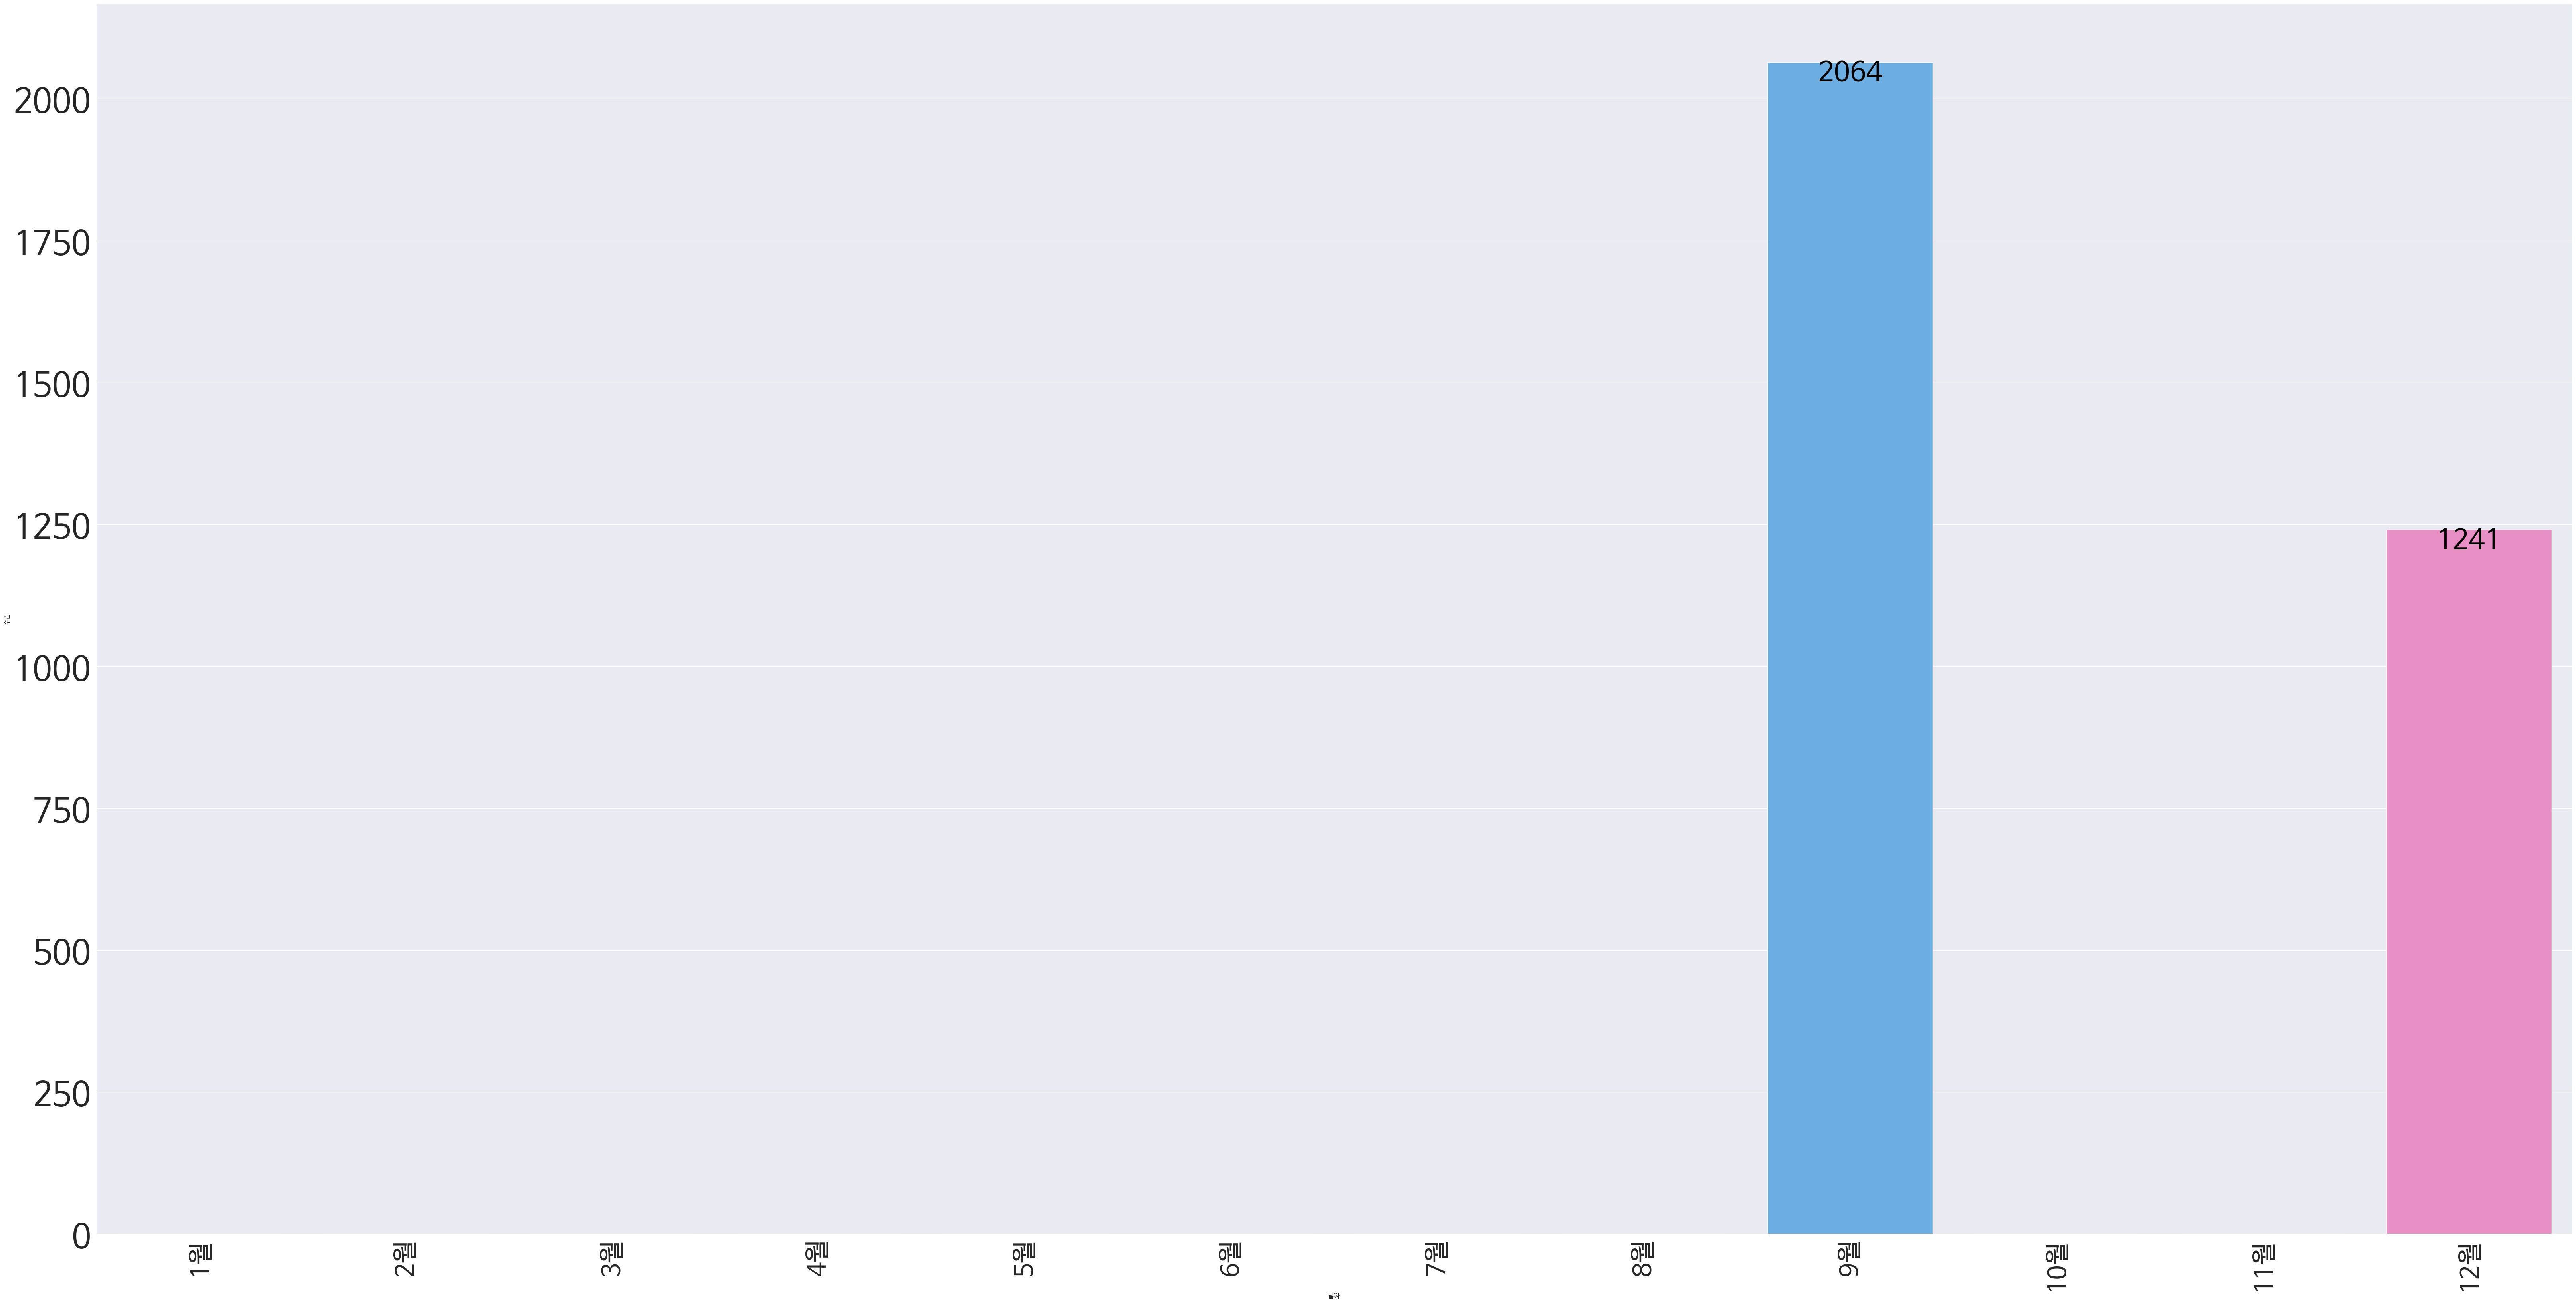

In [ ]:
g = sns.barplot(data=income_money ,x="날짜",y="수입", ci=None)
ax = g

sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
plt.rc('xtick', labelsize=60)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=60)
plt.rc('font', family='NanumBarunGothic') 
plt.xticks(fontsize=45, rotation=90)

rcParams['figure.figsize'] = 80, 40
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

for p in ax.patches: 
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
       ha='center', va='center', fontsize=50, color='black', xytext=(0, 10), 
       textcoords='offset points') 

plt.show()

### 과별 지출

In [ ]:
Spend_dic = {
    '건설환경공학과': 2749390,
    '건축학부': 2527610,
    '교통물류공학과': 3754180,
    '국방정보공학과': 3581316,
    '기계공학과': 6080010,
    '로봇공학과': 7899062,
    '산업경영공학과' : 6494484,
    '생명나노공학과' : 5995522,
    '스마트융합공학과' : 6842940,
    '재료화학공학과' : 8549150,
}

df_Spend = pd.DataFrame(list(Spend_dic.items()), columns=['학과', '지출'])
df_Spend

,학과,지출
0,건설환경공학과,2749390
1,건축학부,2527610
2,교통물류공학과,3754180
3,국방정보공학과,3581316
4,기계공학과,6080010
5,로봇공학과,7899062
6,산업경영공학과,6494484
7,생명나노공학과,5995522
8,스마트융합공학과,6842940
9,재료화학공학과,8549150


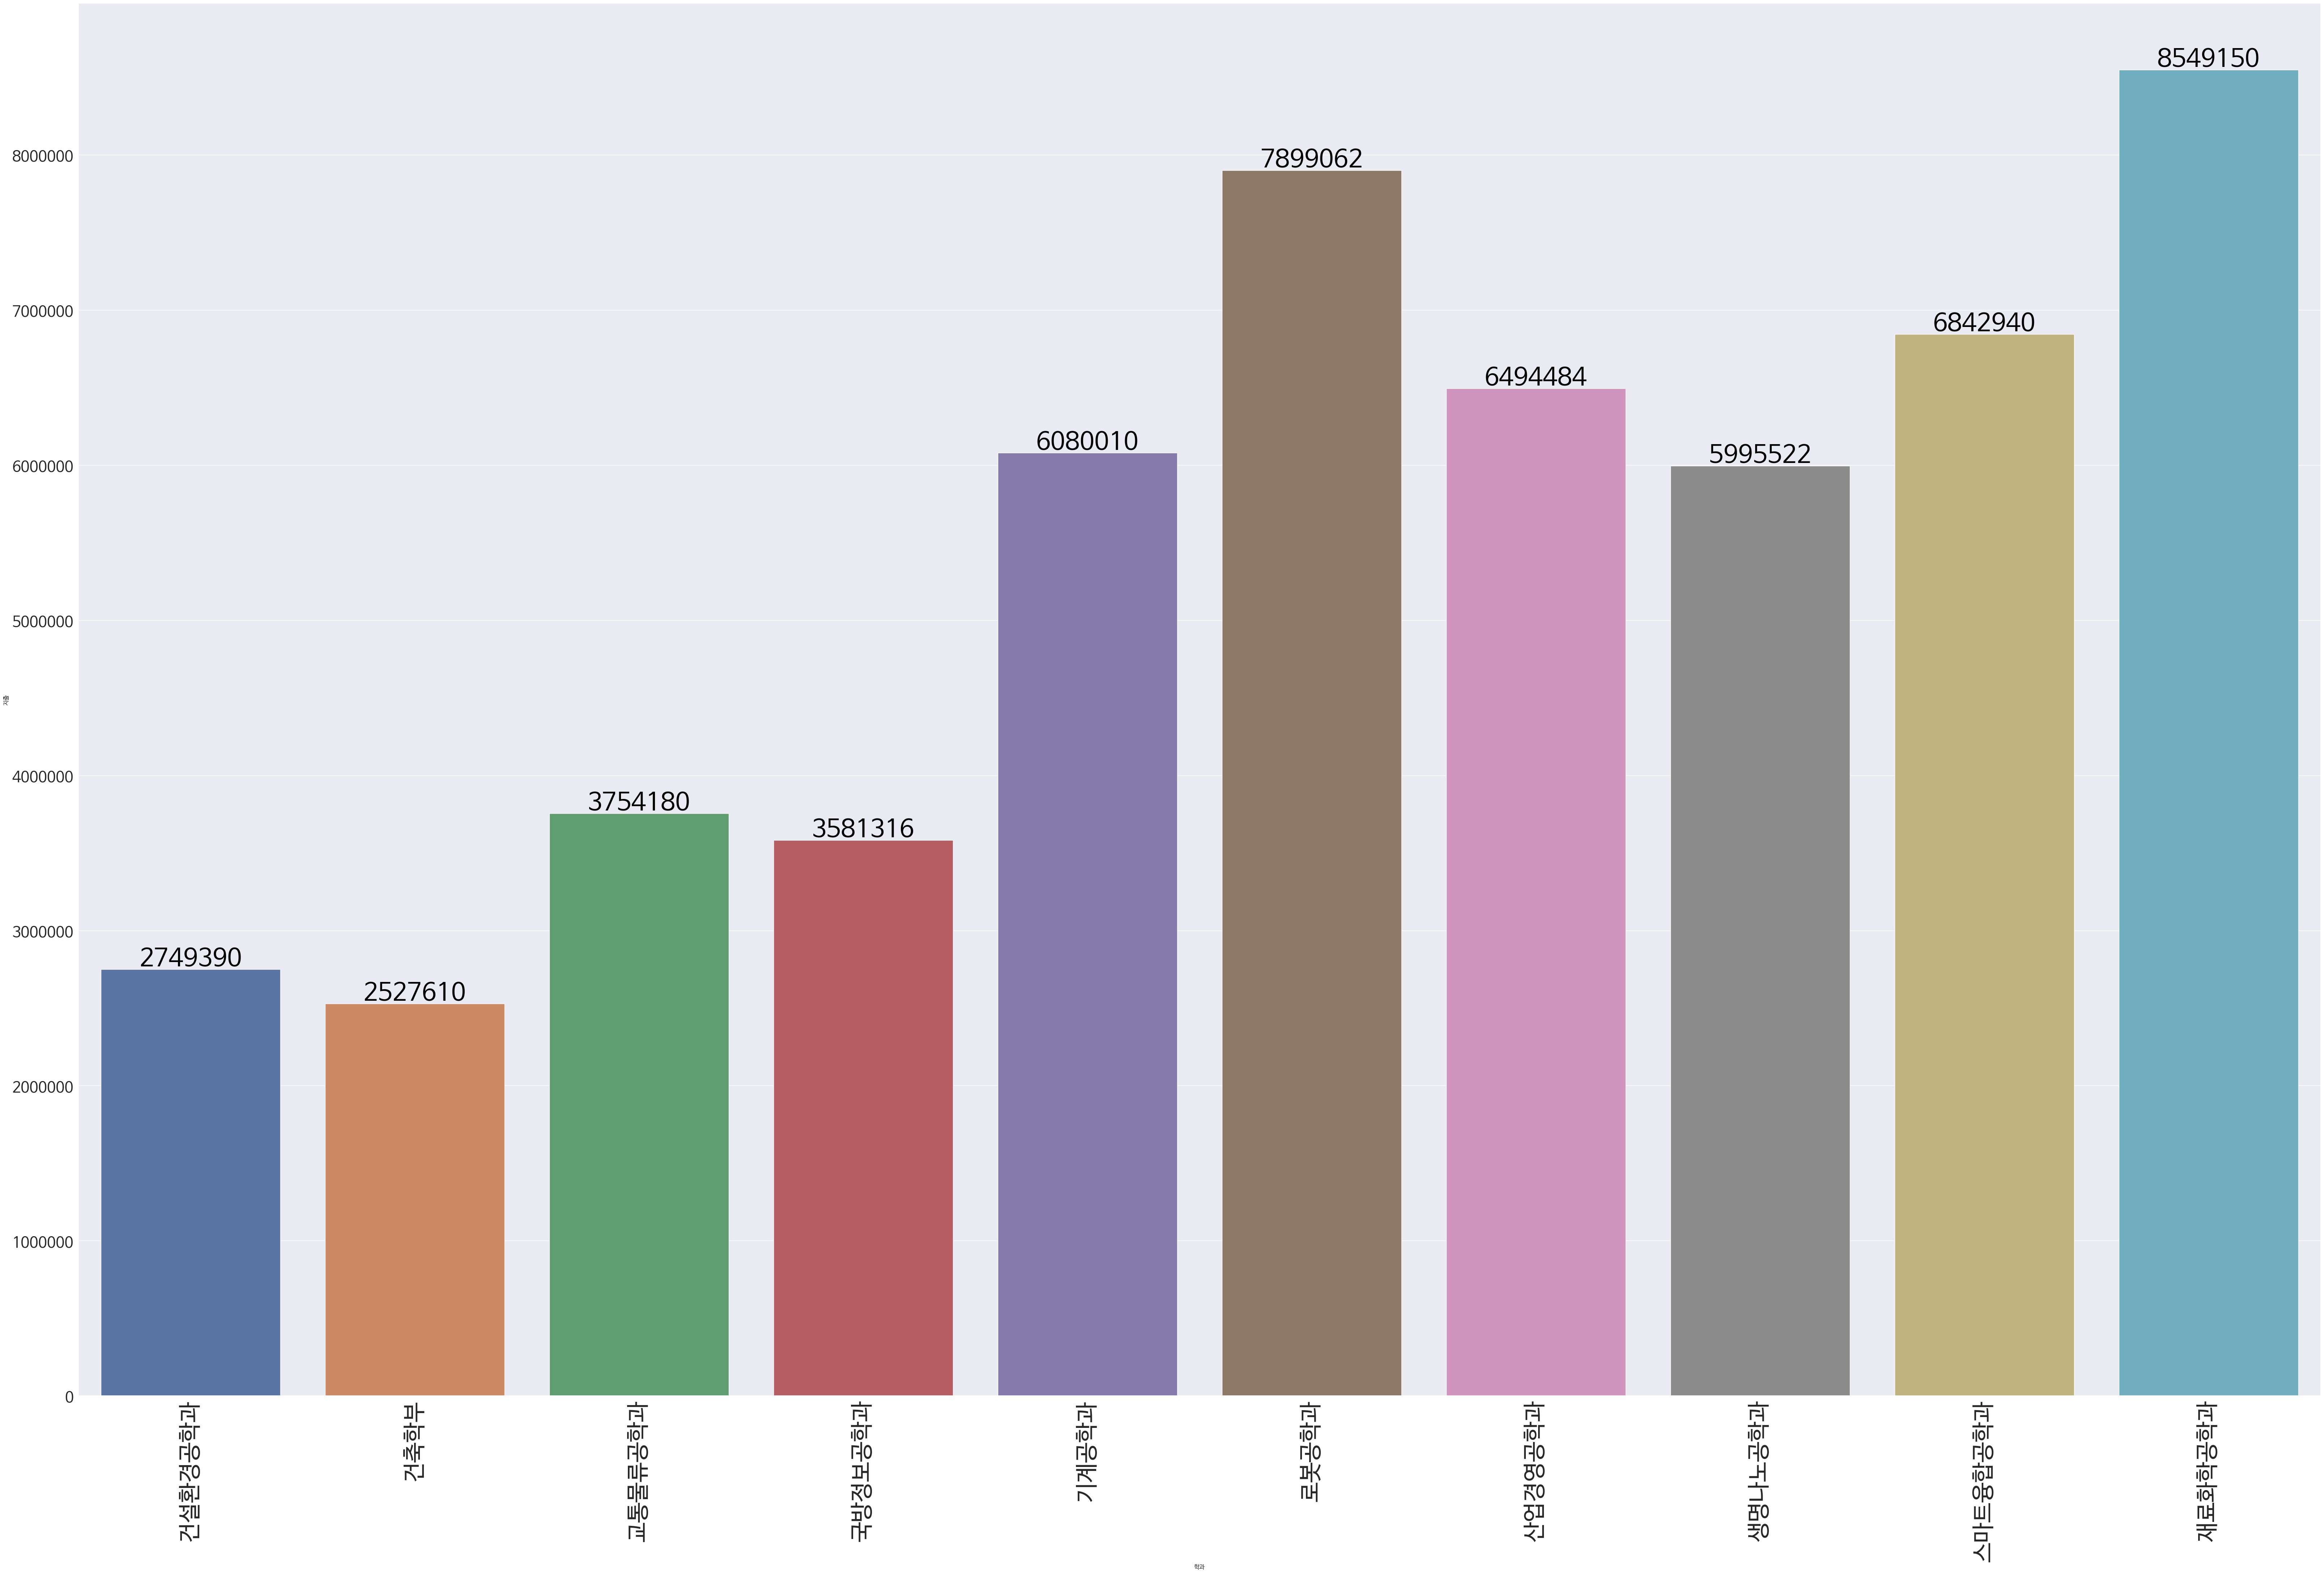

In [ ]:
g = sns.barplot(data=df_Spend ,x="학과",y="지출", ci=None)
ax = g

sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
plt.rc('xtick', labelsize=30)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=30)
plt.rc('font', family='NanumBarunGothic') 
plt.xticks(fontsize=45, rotation=90)

rcParams['figure.figsize'] = 80, 50
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

for p in ax.patches: 
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
       ha='center', va='center', fontsize=50, color='black', xytext=(0, 20), 
       textcoords='offset points') 

plt.show()


### 과별 수입 (학생회비)

In [ ]:
SCF_dic = {
    '건설환경공학과': 0,
    '건축학부': 0,
    '교통물류공학과': 0,
    '국방정보공학과': 173250,
    '기계공학과': 0,
    '로봇공학과': 0,
    '산업경영공학과' : 0,
    '생명나노공학과' : 0,
    '스마트융합공학과' : 0,
    '재료화학공학과' : 0,
}

df_SCF = pd.DataFrame(list(SCF_dic.items()), columns=['학과', '학생회비 INCOME'])
df_SCF

,학과,학생회비 INCOME
0,건설환경공학과,0
1,건축학부,0
2,교통물류공학과,0
3,국방정보공학과,173250
4,기계공학과,0
5,로봇공학과,0
6,산업경영공학과,0
7,생명나노공학과,0
8,스마트융합공학과,0
9,재료화학공학과,0


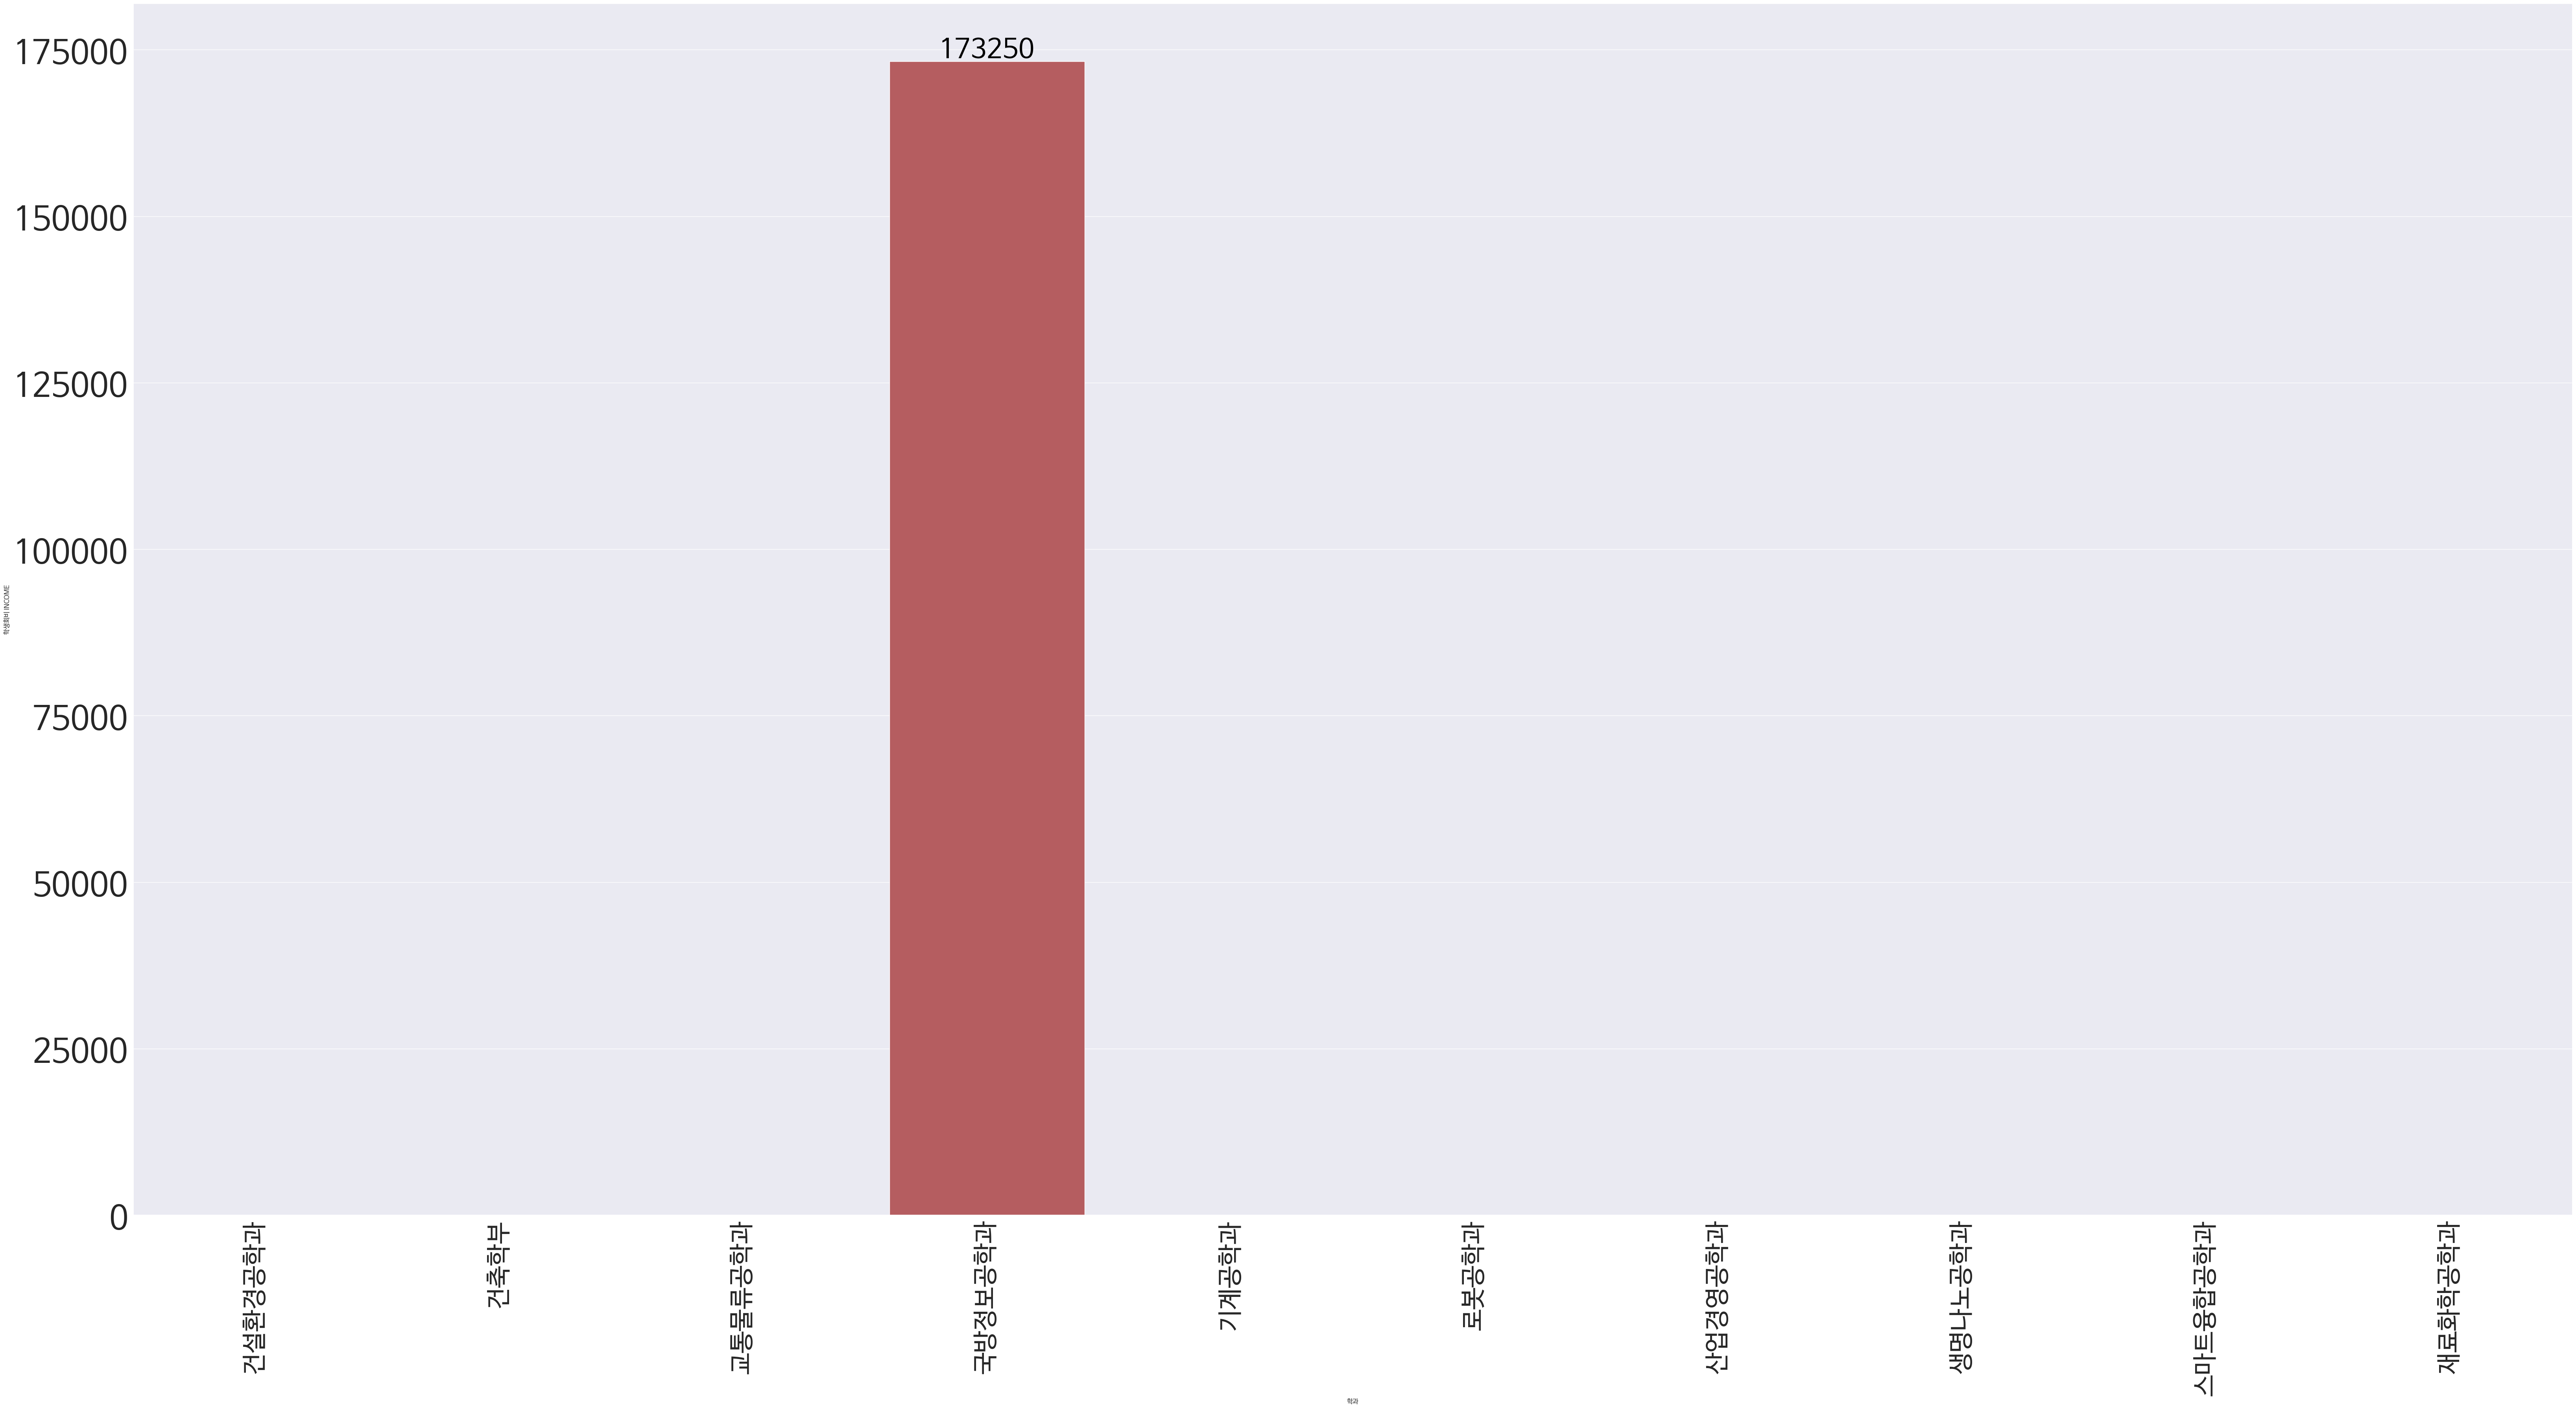

In [ ]:
g = sns.barplot(data=df_SCF ,x="학과",y="학생회비 INCOME", ci=None)
ax = g

sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
plt.rc('xtick', labelsize=30)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=30)
plt.rc('font', family='NanumBarunGothic') 
plt.xticks(fontsize=45, rotation=90)

rcParams['figure.figsize'] = 80, 50
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

for p in ax.patches: 
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
       ha='center', va='center', fontsize=50, color='black', xytext=(0, 20), 
       textcoords='offset points') 

plt.show()

### 과별 야식사업

In [ ]:
Snack_Money_dic = {
    '건설환경공학과': 1054000,
    '건축학부': 981480,
    '교통물류공학과': 3754180,
    '국방정보공학과': 302500,
    '기계공학과': 1797300,
    '로봇공학과': 1107100,
    '산업경영공학과' : 737219,
    '생명나노공학과' : 1767840,
    '스마트융합공학과' : 0,
    '재료화학공학과' : 1809000,
}

df_Snack_Money = pd.DataFrame(list(Snack_Money_dic.items()), columns=['학과', '야식사업지출'])
df_Snack_Money

,학과,야식사업지출
0,건설환경공학과,1054000
1,건축학부,981480
2,교통물류공학과,3754180
3,국방정보공학과,302500
4,기계공학과,1797300
5,로봇공학과,1107100
6,산업경영공학과,737219
7,생명나노공학과,1767840
8,스마트융합공학과,0
9,재료화학공학과,1809000


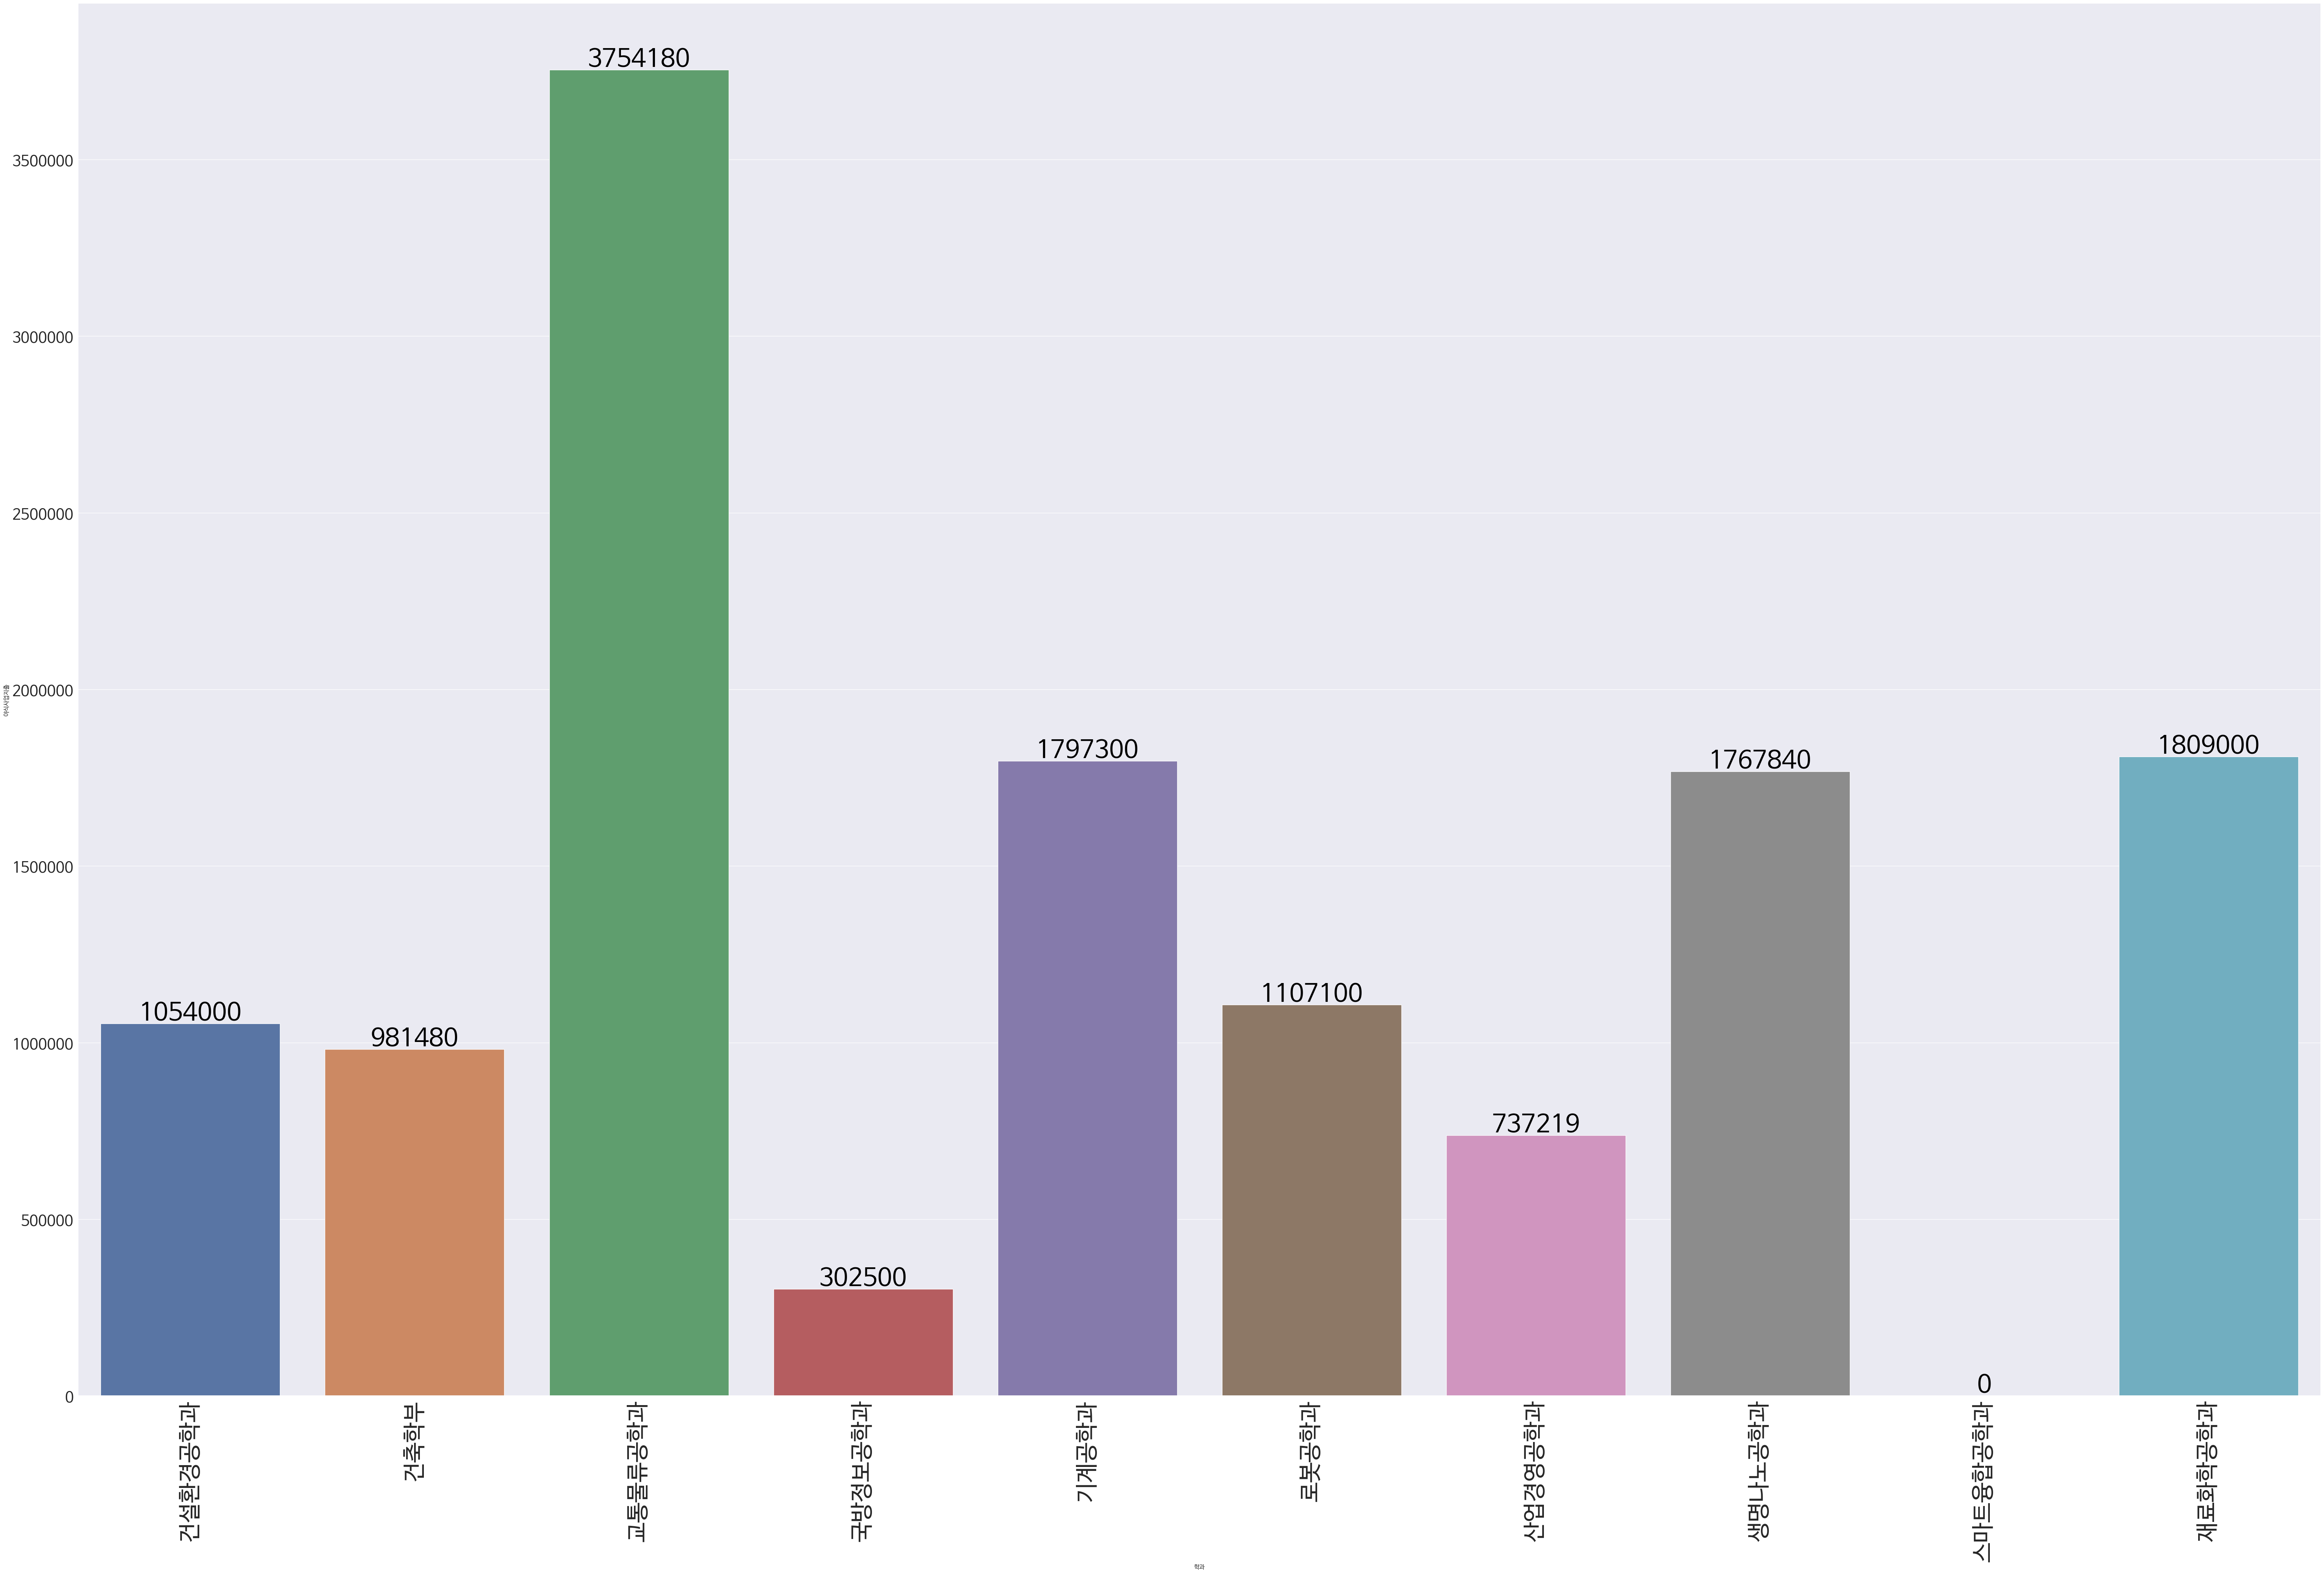

In [ ]:
g = sns.barplot(data=df_Snack_Money ,x="학과",y="야식사업지출", ci=None)
ax = g

sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
plt.rc('xtick', labelsize=30)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=30)
plt.rc('font', family='NanumBarunGothic') 
plt.xticks(fontsize=45, rotation=90)

rcParams['figure.figsize'] = 80, 50
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

for p in ax.patches: 
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
       ha='center', va='center', fontsize=50, color='black', xytext=(0, 20), 
       textcoords='offset points') 

plt.show()